# Dog/Cat Classifier using CNN

**Scenario**: We pull the training dataset of 25,000 dog and cat pictures split evenly from the [Kaggle Dogs vs. Cats](https://www.kaggle.com/competitions/dogs-vs-cats/data) competition data file `train.zip`. 

For the purpose of manageably uploading all project files to GitHub and implementing this model, we reduce our dataset size to 200 random dog and cat pictures with a 30/70 split:
- Training set: 70 dogs and 70 cats
- Test set: 60 random dog and cat pictures

**Goal**: Using the convolutional neural network model (CNN), classify a new image as either a dog or a cat.

**Results**: 

We tested 10 single predictions after building and training the CNN model on the abridged dataset of 200 images. Out of the 10, five were misclassified. 

Performing the analysis using the full dataset, three were misclassified. It appears that increasing the training set size improved the results by decreasing the loss and increasing the accuracy.

| Training Size | Test Size | Misclassified | Loss | Accuracy
| :--: | :--: | :--: | :--: | :--: |
| 140 | 60 | 2, 4, 5, 6, 9 | 0.4150 | 0.8643 |
| 25,000 | 15,001 | 1, 2, 4 | 0.2437 | 0.8977 |

It appears that both models misclassified the cat images 2 and 4 as dogs. These are shown below.

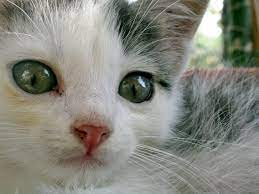

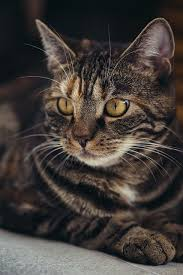

In [40]:
from IPython.display import Image, display
display(Image(filename="./dataset/single_prediction/cat_or_dog_2.jpeg", width=200))
display(Image(filename="./dataset/single_prediction/cat_or_dog_4.jpeg"))

### Importing the libraries

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
from keras.preprocessing import image

In [3]:
tf.__version__

'2.13.0-rc1'

## Part 1 - Data Preprocessing

We set `full_dataset` to `False` to analyze our abridged dataset of 140 training images and 60 test images. For our local copy, we can set `full_set` to `True` to use the full dataset of 25,000 training images and 12,500 test images.

In [4]:
use_full_set = False

if use_full_set == True:
    data_path = "config" # hidden folder
else:
    data_path = "dataset"

### Preprocessing the Training set

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory(f'{data_path}/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 140 images belonging to 2 classes.


### Preprocessing the Test set

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(f'{data_path}/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 60 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [7]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [9]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [11]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [12]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [13]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [14]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [15]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
5/5 [==============================] - 2s 207ms/step - loss: 0.8906 - accuracy: 0.4786 - val_loss: 0.7122 - val_accuracy: 0.5000
Epoch 2/25
5/5 [==============================] - 0s 65ms/step - loss: 0.7027 - accuracy: 0.5000 - val_loss: 0.6958 - val_accuracy: 0.5000
Epoch 3/25
5/5 [==============================] - 0s 64ms/step - loss: 0.6962 - accuracy: 0.5000 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 4/25
5/5 [==============================] - 0s 71ms/step - loss: 0.6922 - accuracy: 0.5000 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 5/25
5/5 [==============================] - 0s 75ms/step - loss: 0.6903 - accuracy: 0.5000 - val_loss: 0.6910 - val_accuracy: 0.5000
Epoch 6/25
5/5 [==============================] - 0s 64ms/step - loss: 0.6946 - accuracy: 0.5000 - val_loss: 0.6910 - val_accuracy: 0.5000
Epoch 7/25
5/5 [==============================] - 0s 76ms/step - loss: 0.6866 - accuracy: 0.5000 - val_loss: 0.6863 - val_accuracy: 0.5000
Epoch 8/25
5/5 [==========

## Part 4 - Making a single prediction

### Using the abridged dataset

In [37]:
# Change number between 1-10 to test different predictions
img_num = 10
img_path = f'{data_path}/single_prediction/cat_or_dog_{img_num}.jpeg'
test_image = image.load_img(img_path, target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 20ms/step


dog


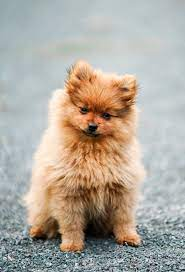

In [38]:
print(prediction)
display(Image(filename=img_path))

Summary of single predictions using the abridged dataset:

| Image | Predicted | Actual
| :--: | :-- | :-- |
| 1 | Cat | Cat |
| 2 | Dog | Cat |
| 3 | Cat | Cat |
| 4 | Dog | Cat |
| 5 | Cat | Cat |
| 6 | Cat | Dog |
| 7 | Dog | Dog |
| 8 | Dog | Dog |
| 9 | Cat | Dog |
| 10 | Dog | Dog |

Out of a small sample of 10 single predictions, half of the images were misclassified: 2, 4, 5, 6, and 9.

### Using the full dataset

Summary of single predictions using the full dataset:

| Image | Predicted | Actual
| :--: | :-- | :-- |
| 1 | Dog | Cat |
| 2 | Dog | Cat |
| 3 | Cat | Cat |
| 4 | Dog | Cat |
| 5 | Cat | Cat |
| 6 | Dog | Dog |
| 7 | Dog | Dog |
| 8 | Dog | Dog |
| 9 | Dog | Dog |
| 10 | Dog | Dog |

Three images were misclassified: 1, 2, and 4. In this case, more training examples led to lower loss and higher accuracy.

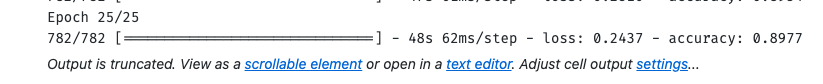

In [18]:
display(Image(filename="output_full_dataset.png"))